# Compare heldout performance on predicting age and pseudo-age

- Need to hold out age
- minmax normalize chronological age
- also try binning pseudo age

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from aging.plotting import format_plots, figure

In [2]:
format_plots()

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_pseudotime_v02.parquet')

In [4]:
df = df.dropna(subset=['pseudotime_rank'])

In [5]:
df.filter(regex='\d')

0  \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.019225   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.015543   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.022178   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.024126   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.017040   
...                                                                               ...   
90  c03_m04_b04  ontogeny_males_90w    791599d2-5a73-485b-8d0e-3be0a239f8ea  0.082436   
    c04_m01_b01  ontogney_males_90w    99be4de5-aaef-44c5-85a6-7f571b786692  0.098925   
    c04_m02_b02  ontogeny_males_90w    7a5f5257-fd29-4451-9680-b2cee905c337  0.084219   
    c04_m03_b03  ontogeny_males_90w    b365ea6a-369f-4991-b139-15694dc1c86d  0.052885   
    c04_m04_b04  ontogeny_males_90w    b0c2ea14-f73c-4922-b1bc-099fa0b9f5aa  0.063830   

                                                                                    1  \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.015046   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.006452   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.003310   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.029547   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.003341   
...                                                                               ...   
90  c03_m04_b04  ontogeny_males_90w    791599d2-5a73-485b-8d0e-3be0a239f8ea  0.031069   
    c04_m01_b01  ontogney_males_90w    99be4de5-aaef-44c5-85a6-7f571b786692  0.023297   
    c04_m02_b02  ontogeny_males_90w    7a5f5257-fd29-4451-9680-b2cee905c337  0.027942   
    c04_m03_b03  ontogeny_males_90w    b365ea6a-369f-4991-b139-15694dc1c86d  0.067308   
    c04_m04_b04  ontogeny_males_90w    b0c2ea14-f73c-4922-b1bc-099fa0b9f5aa  0.042553   

                                                                                    2  \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.023126   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.020235   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.023171   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.034969   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.013030   
...                                                                               ...   
90  c03_m04_b04  ontogeny_males_90w    791599d2-5a73-485b-8d0e-3be0a239f8ea  0.061309   
    c04_m01_b01  ontogney_males_90w    99be4de5-aaef-44c5-85a6-7f571b786692  0.049462   
    c04_m02_b02  ontogeny_males_90w    7a5f5257-fd29-4451-9680-b2cee905c337  0.062574   
    c04_m03_b03  ontogeny_males_90w    b365ea6a-369f-4991-b139-15694dc1c86d  0.063462   
    c04_m04_b04  ontogeny_males_90w    b0c2ea14-f73c-4922-b1bc-099fa0b9f5aa  0.076368   

                                                                                    3  \
age subject_name session_name          uuid                                             
3   c07_m01_b01  ontogney_males_3w     0514b112-c12c-4785-84bd-93a8b40235e9  0.011424   
    c07_m02_b02  ontogeny_males_3w     4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.014370   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409  0.012248   
    c07_m04_b04  ontogeny_males_3w     2b5a857f-2e64-470c-801e-1149450c6f56  0.033885   
    m01b01c01    ontogeny_cohorts_3wks 56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7 

In [6]:
pseudo_cuts = pd.qcut(df['pseudotime_rank'], df.index.get_level_values('age').nunique(), labels=False)

In [7]:
enc = LabelEncoder().fit(df.index.get_level_values('age'))
age_cuts = enc.transform(df.index.get_level_values('age'))

In [8]:
age_cuts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [9]:
pseudo_mapped = enc.inverse_transform(pseudo_cuts)

In [10]:
pseudo_cuts

age  subject_name  session_name           uuid                                
3    c07_m01_b01   ontogney_males_3w      0514b112-c12c-4785-84bd-93a8b40235e9    1
     c07_m02_b02   ontogeny_males_3w      4c88ce4e-4ba7-4c6b-84f6-b979c71e2439    0
     c07_m03_b03   ontogeny_males_3w      183c7534-404c-4071-9b7f-7285d7459409    0
     c07_m04_b04   ontogeny_males_3w      2b5a857f-2e64-470c-801e-1149450c6f56    1
     m01b01c01     ontogeny_cohorts_3wks  56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7    0
                                                                                 ..
90   c03_m04_b04   ontogeny_males_90w     791599d2-5a73-485b-8d0e-3be0a239f8ea    9
     c04_m01_b01   ontogney_males_90w     99be4de5-aaef-44c5-85a6-7f571b786692    9
     c04_m02_b02   ontogeny_males_90w     7a5f5257-fd29-4451-9680-b2cee905c337    9
     c04_m03_b03   ontogeny_males_90w     b365ea6a-369f-4991-b139-15694dc1c86d    4
     c04_m04_b04   ontogeny_males_90w     b0c2ea14-f73c-4922-b1bc-099fa0b9f5aa   

In [11]:
pipeline = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=3),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=np.log(df.index.get_level_values("age")),
    groups=df.index.get_level_values("age"),
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(np.log(df.index.get_level_values("age")), age_hat.squeeze())

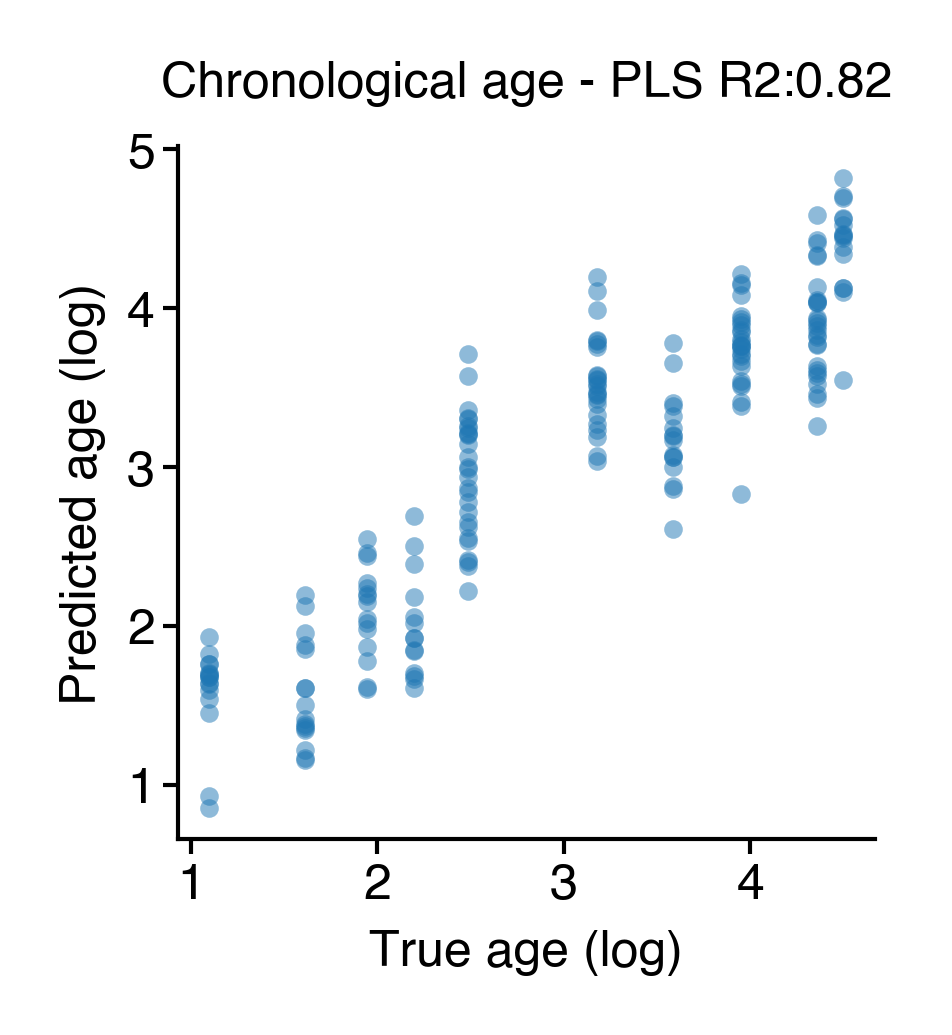

In [12]:
fig = figure(1.5, 1.5)
plt.scatter(np.log(df.index.get_level_values("age")), age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (log)")
plt.ylabel("Predicted age (log)")
plt.title(f"Chronological age - PLS R2:{r2:0.2f}")
sns.despine()

In [13]:
pipeline = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=3),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=age_cuts,
    groups=df.index.get_level_values("age"),
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(age_cuts, age_hat.squeeze())

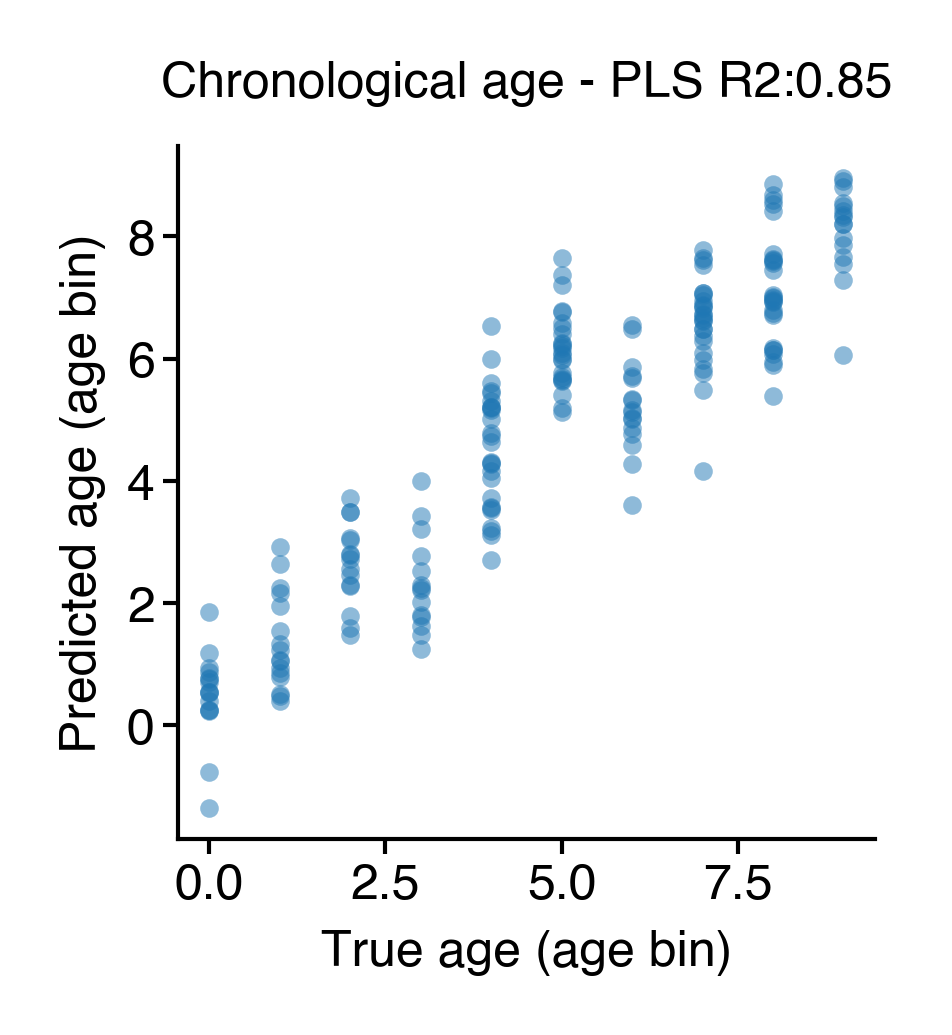

In [14]:
fig = figure(1.5, 1.5)
plt.scatter(age_cuts, age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (age bin)")
plt.ylabel("Predicted age (age bin)")
plt.title(f"Chronological age - PLS R2:{r2:0.2f}")
sns.despine()

In [15]:
pipeline = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=3),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=df["pseudotime_rank"],
    groups=pseudo_cuts,
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(df["pseudotime_rank"], age_hat.squeeze())

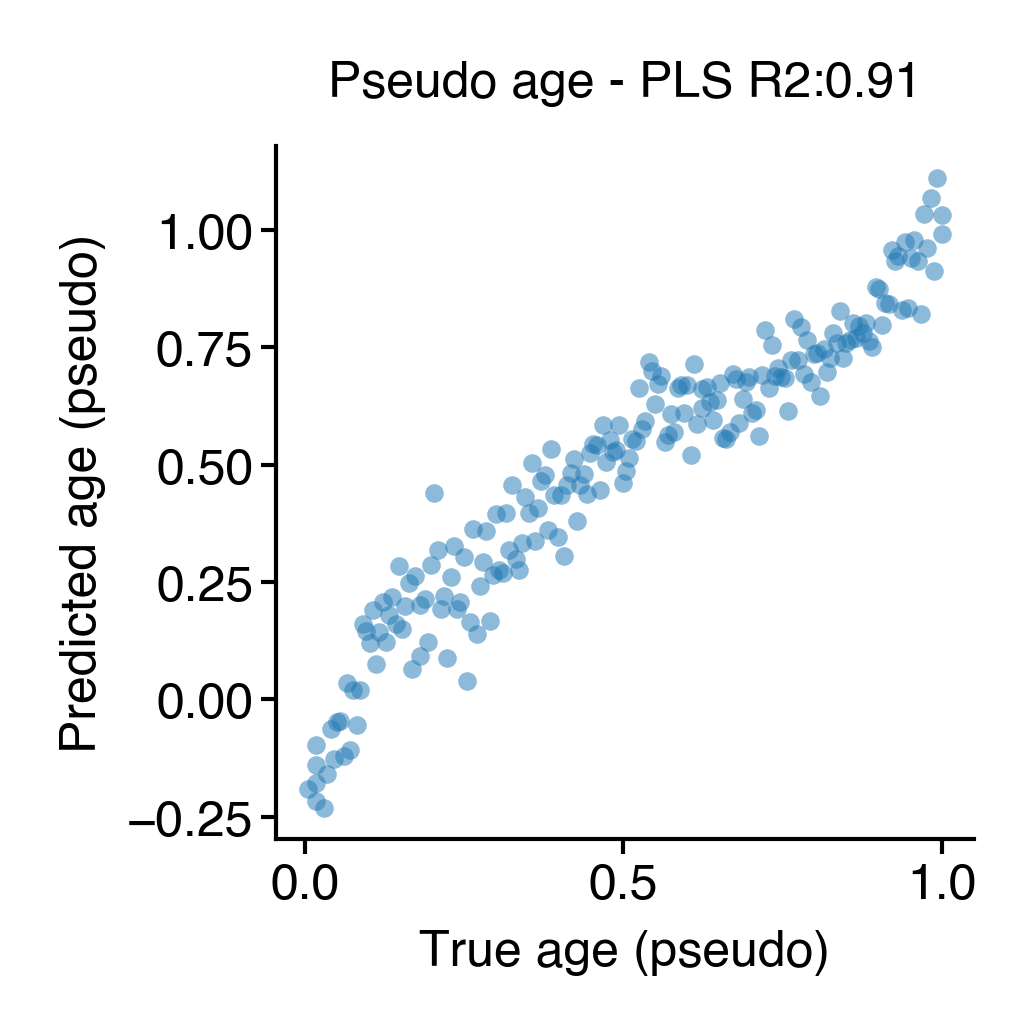

In [16]:
fig = figure(1.5, 1.5)
plt.scatter(df["pseudotime_rank"], age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (pseudo)")
plt.ylabel("Predicted age (pseudo)")
plt.title(f"Pseudo age - PLS R2:{r2:0.2f}")
sns.despine()

In [17]:
pipeline = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=3),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=pseudo_cuts,
    groups=pseudo_cuts,
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(pseudo_cuts, age_hat.squeeze())

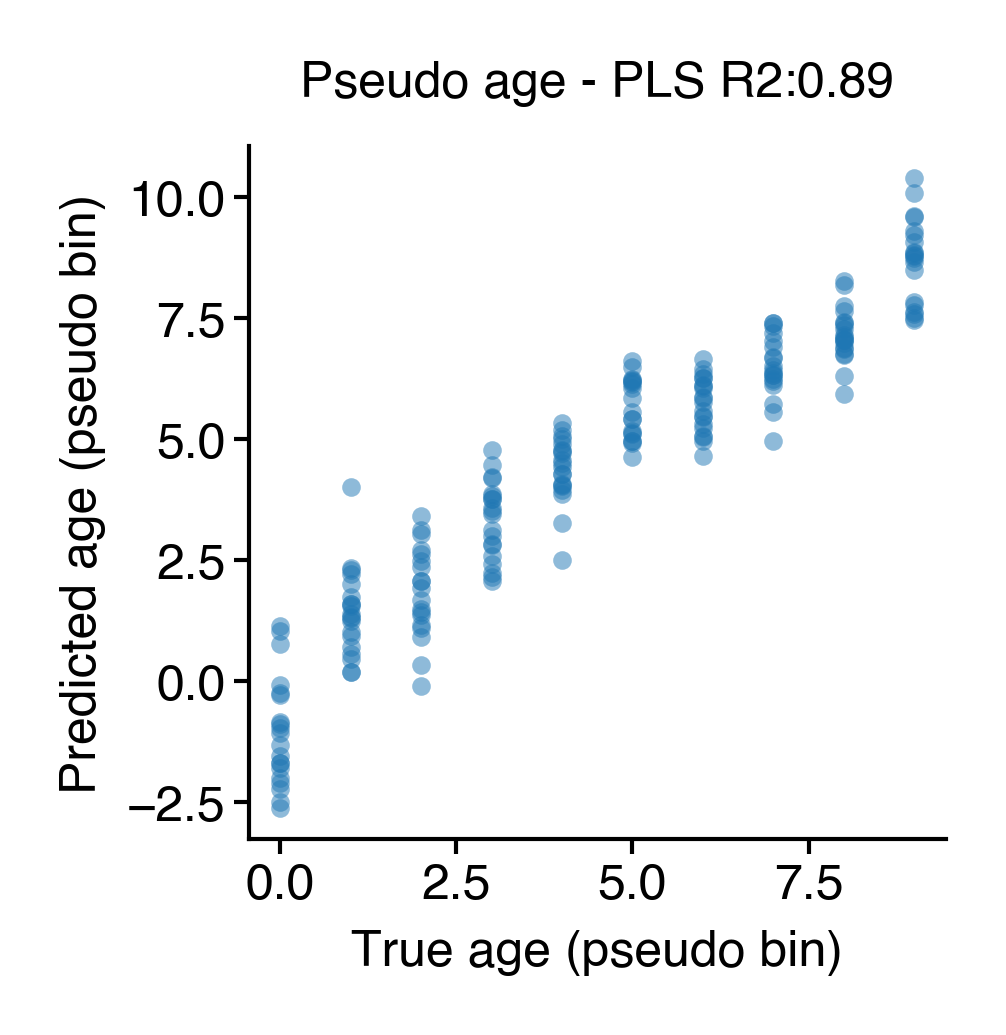

In [18]:
fig = figure(1.5, 1.5)
plt.scatter(pseudo_cuts, age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (pseudo bin)")
plt.ylabel("Predicted age (pseudo bin)")
plt.title(f"Pseudo age - PLS R2:{r2:0.2f}")
sns.despine()

In [32]:
pipeline = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=3),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=np.log(pseudo_mapped),
    groups=pseudo_cuts,
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(np.log(pseudo_mapped), age_hat.squeeze())

0.8763659804742236

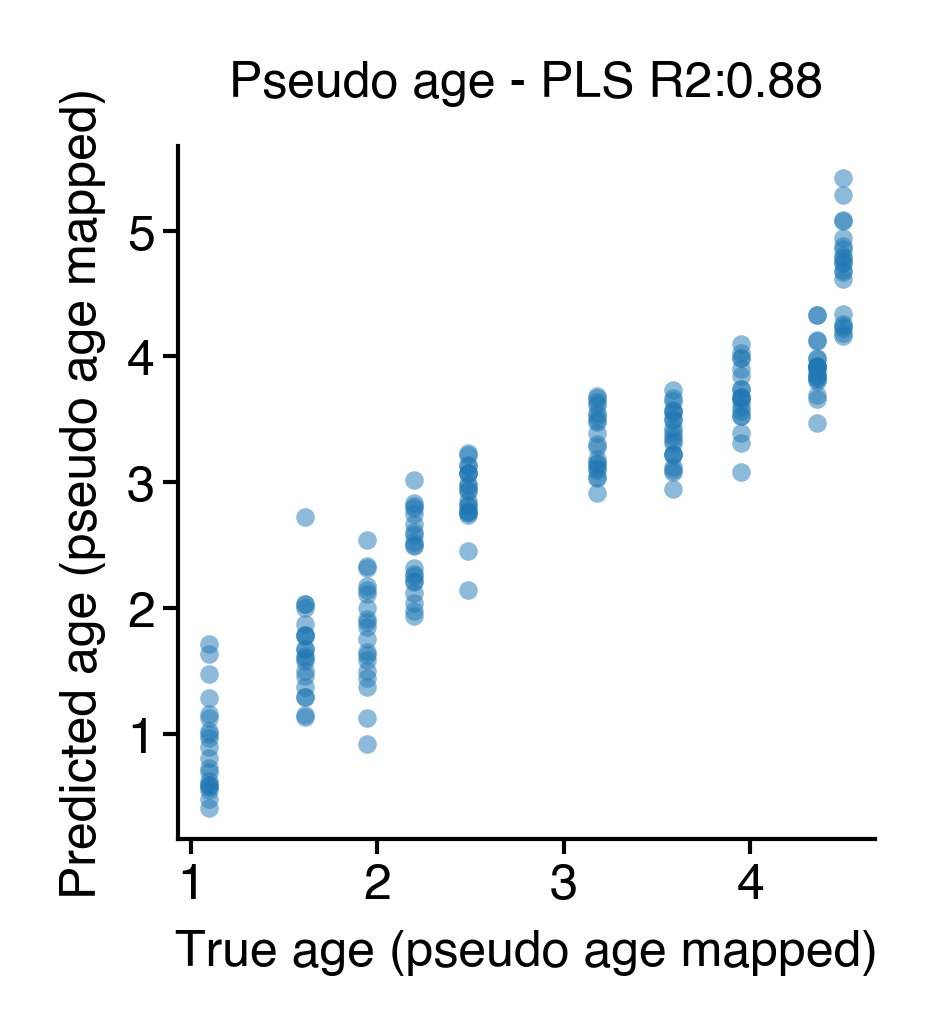

In [33]:
fig = figure(1.5, 1.5)
plt.scatter(np.log(pseudo_mapped), age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (pseudo age mapped)")
plt.ylabel("Predicted age (pseudo age mapped)")
plt.title(f"Pseudo age - PLS R2:{r2:0.2f}")
sns.despine()

In [14]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=6),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=df["pseudotime_rank"],
    groups=pseudo_cuts,
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(df["pseudotime_rank"], age_hat.squeeze())

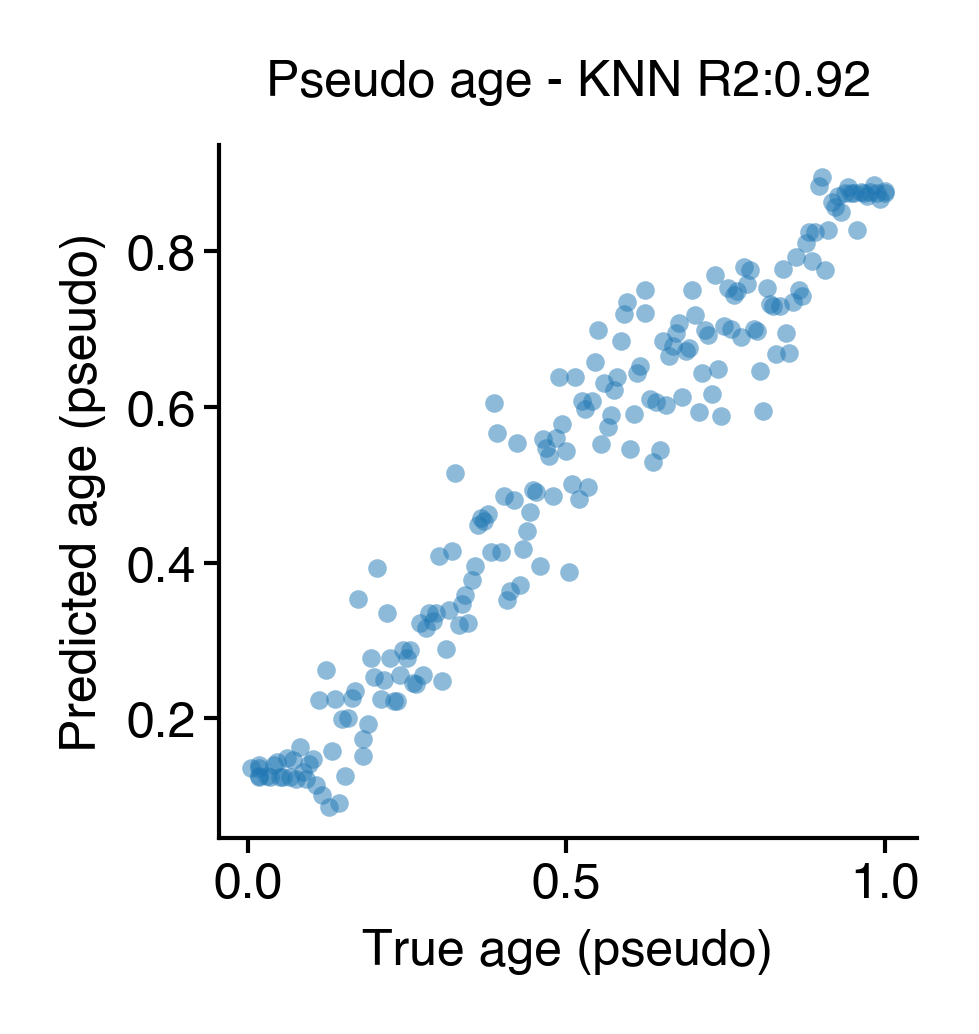

In [15]:
fig = figure(1.5, 1.5)
plt.scatter(df["pseudotime_rank"], age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (pseudo)")
plt.ylabel("Predicted age (pseudo)")
plt.title(f"Pseudo age - KNN R2:{r2:0.2f}")
sns.despine()

In [16]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=6),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=np.log(df.index.get_level_values("age")),
    groups=df.index.get_level_values("age"),
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(np.log(df.index.get_level_values("age")), age_hat.squeeze())

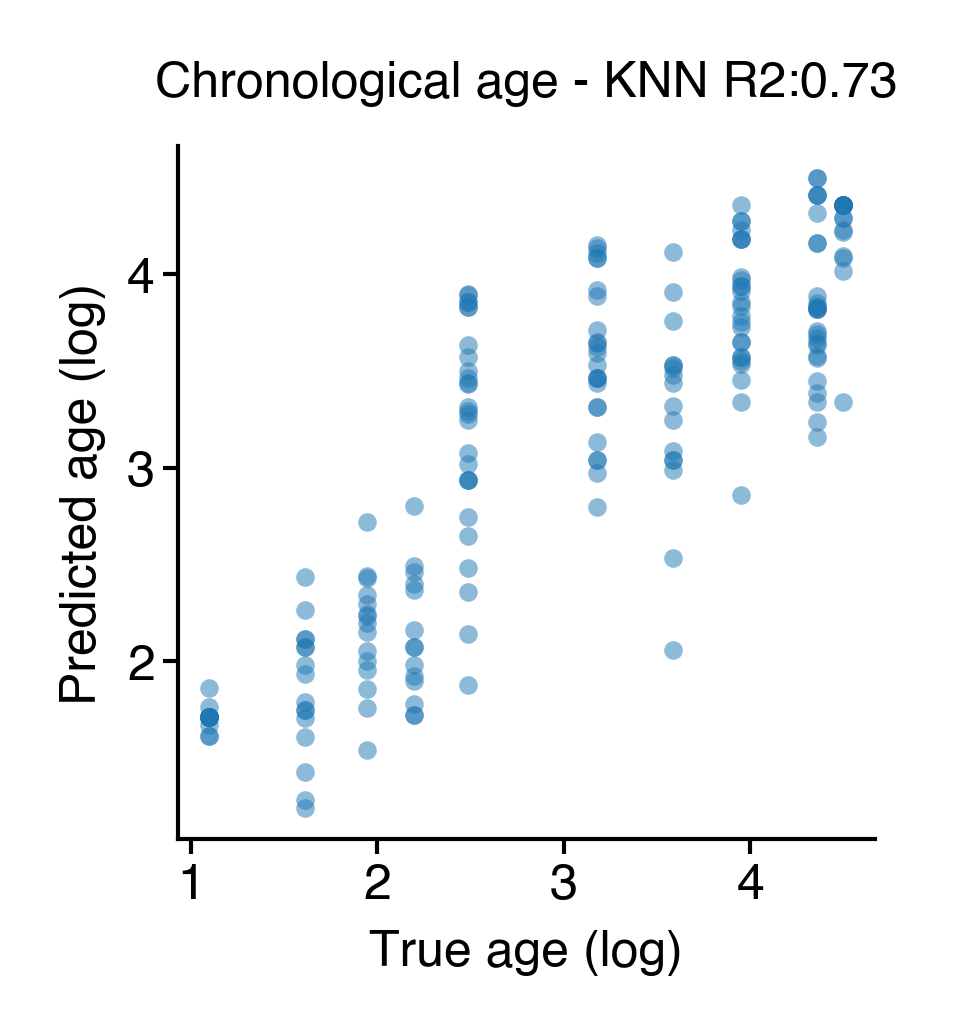

In [17]:
fig = figure(1.5, 1.5)
plt.scatter(np.log(df.index.get_level_values("age")), age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (log)")
plt.ylabel("Predicted age (log)")
plt.title(f"Chronological age - KNN R2:{r2:0.2f}")
sns.despine()

In [31]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=6),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=age_cuts,
    groups=df.index.get_level_values("age"),
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(age_cuts, age_hat.squeeze())

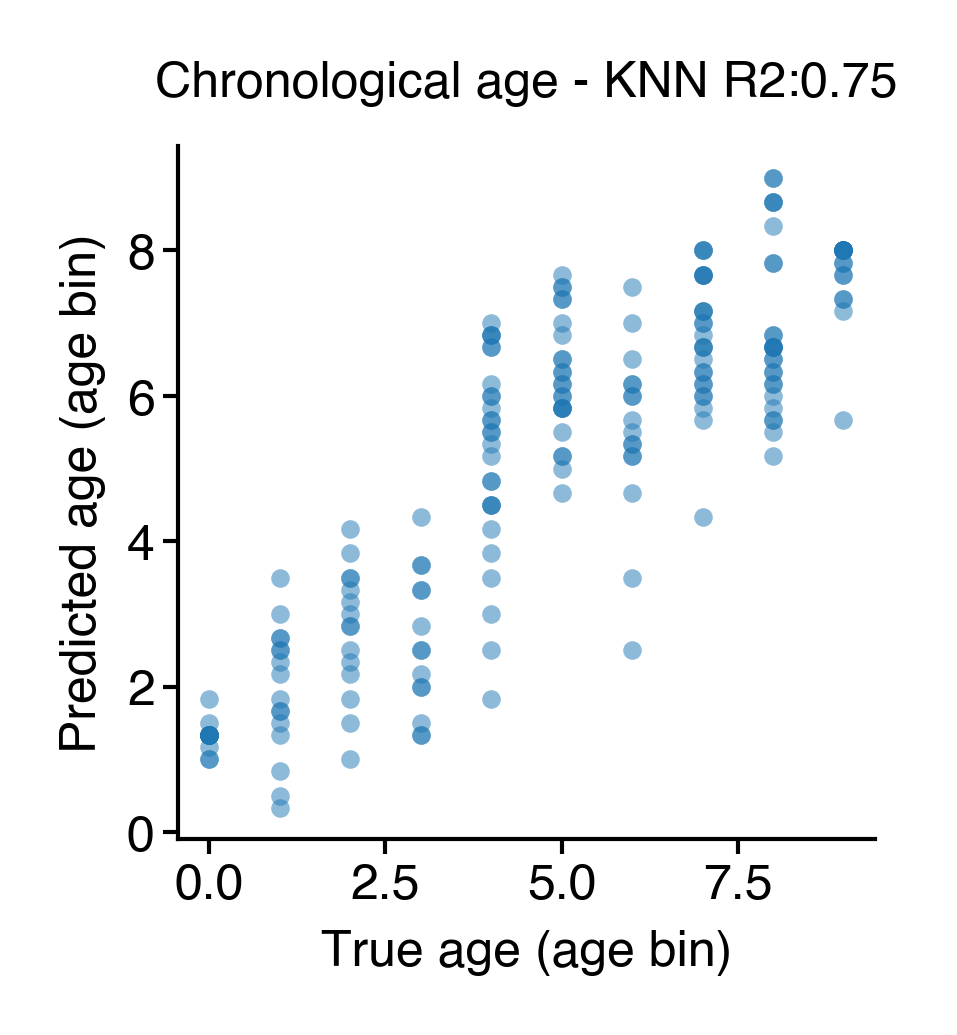

In [32]:
fig = figure(1.5, 1.5)
plt.scatter(age_cuts, age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (age bin)")
plt.ylabel("Predicted age (age bin)")
plt.title(f"Chronological age - KNN R2:{r2:0.2f}")
sns.despine()

In [18]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=6),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=pseudo_cuts,
    groups=pseudo_cuts,
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(pseudo_cuts, age_hat.squeeze())

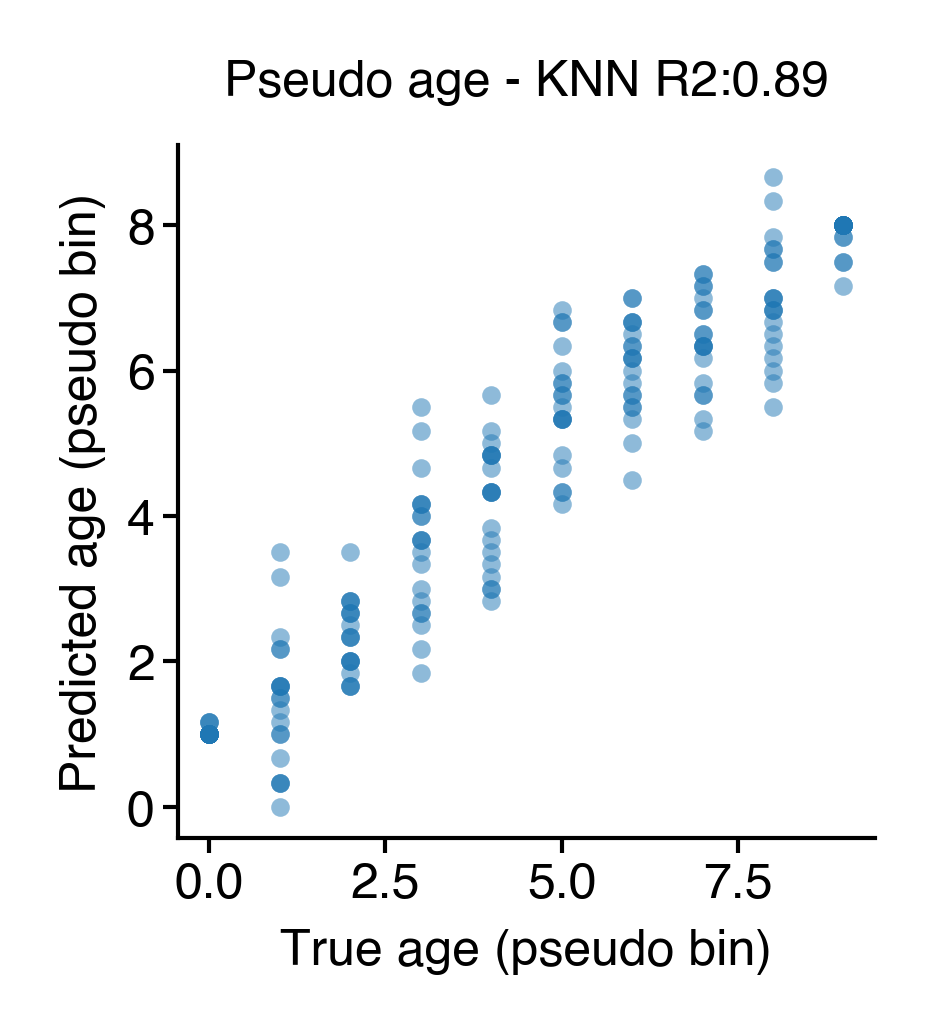

In [19]:
fig = figure(1.5, 1.5)
plt.scatter(pseudo_cuts, age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (pseudo bin)")
plt.ylabel("Predicted age (pseudo bin)")
plt.title(f"Pseudo age - KNN R2:{r2:0.2f}")
sns.despine()

In [34]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=6),
)

age_hat = cross_val_predict(
    pipeline,
    X=df.filter(regex=r"\d"),
    y=np.log(pseudo_mapped),
    groups=pseudo_cuts,
    cv=LeaveOneGroupOut(),
    n_jobs=-1,
)

r2 = r2_score(np.log(pseudo_mapped), age_hat.squeeze())

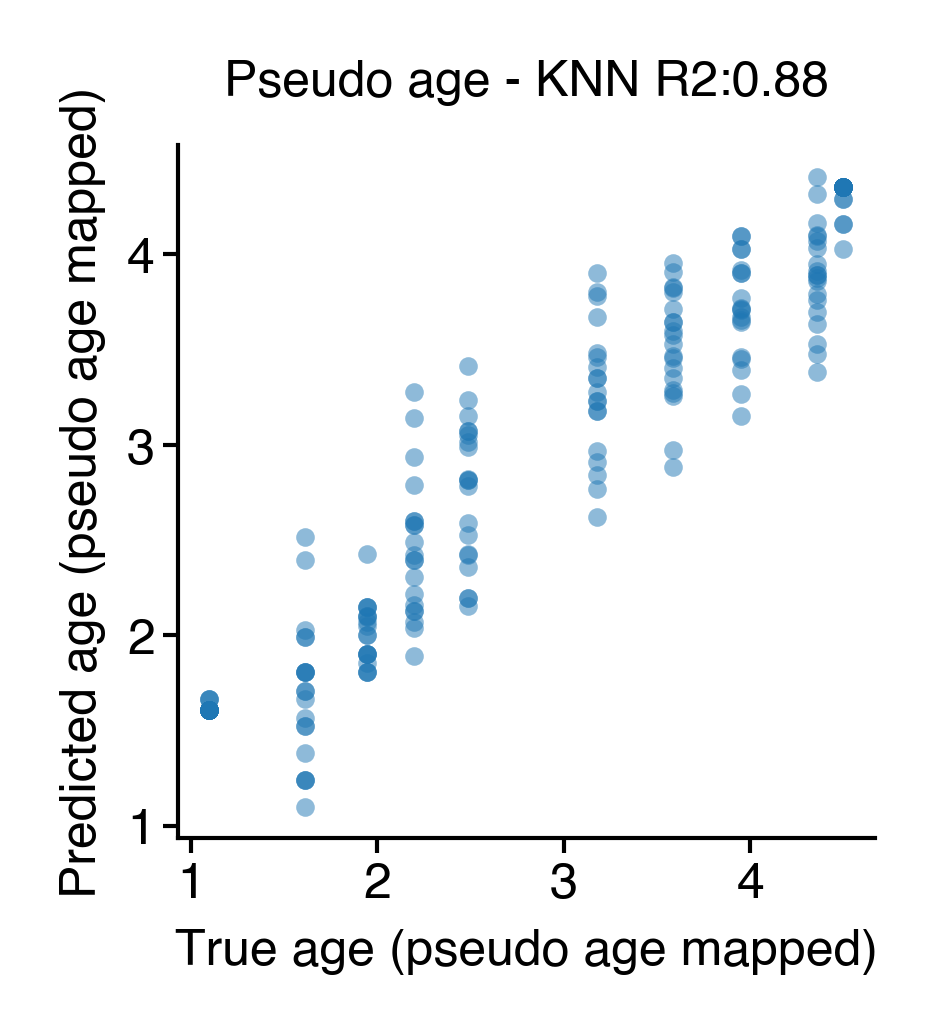

In [35]:
fig = figure(1.5, 1.5)
plt.scatter(np.log(pseudo_mapped), age_hat.squeeze(), s=5, alpha=0.5, lw=0)
plt.xlabel("True age (pseudo age mapped)")
plt.ylabel("Predicted age (pseudo age mapped)")
plt.title(f"Pseudo age - KNN R2:{r2:0.2f}")
sns.despine()